In [28]:
import networkx as nx
import numpy as np
import torch
import torchmetrics
import matplotlib.pyplot as plt
import os 
import seaborn as sns

### Question 2

In [2]:
caltech = nx.read_gml("fb100/data/Caltech36.gml")
jhopkins = nx.read_gml("fb100/data/Johns_Hopkins55.gml")
mit = nx.read_gml("fb100/data/MIT8.gml")

A

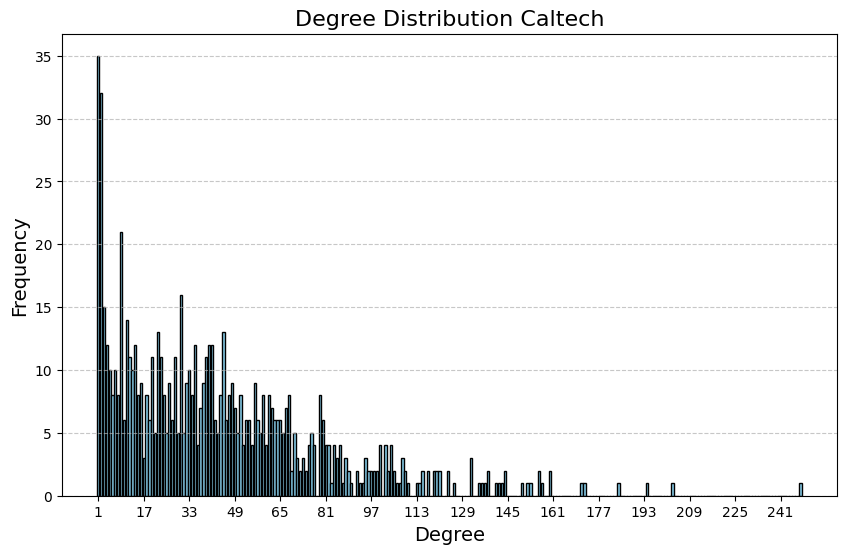

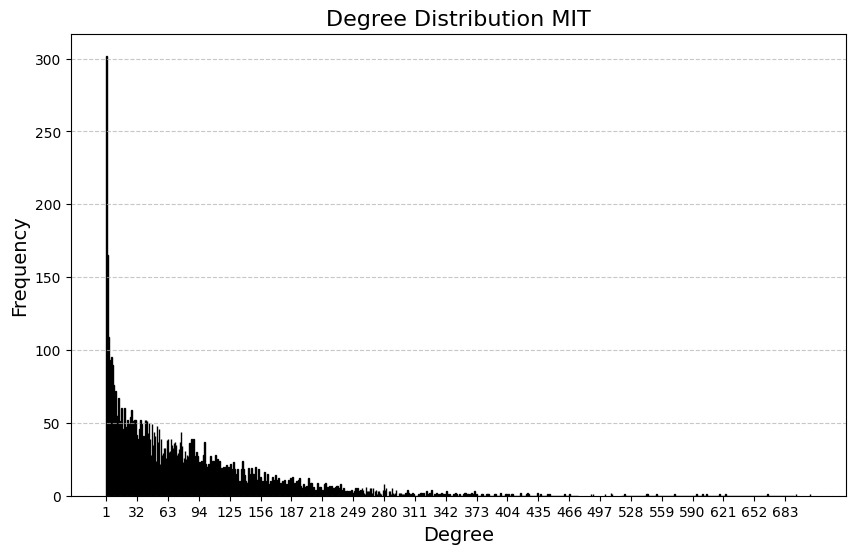

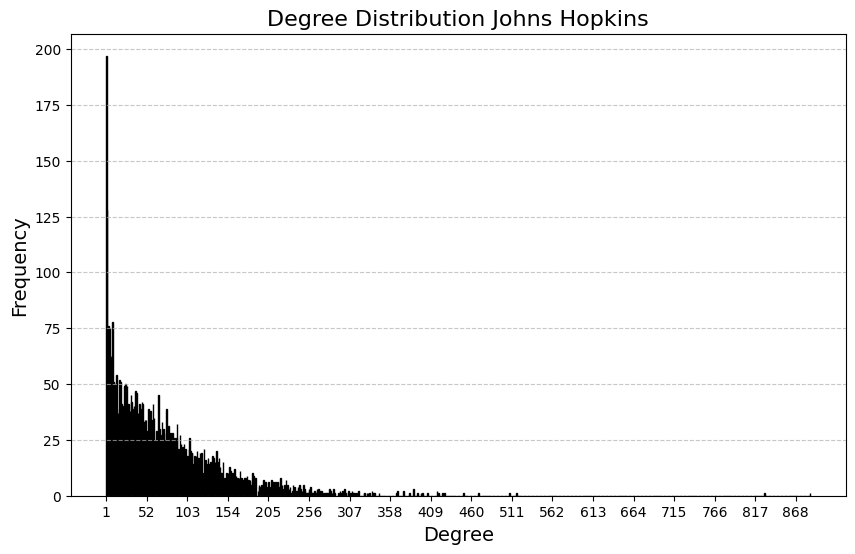

In [9]:
degrees = [degree for _, degree in caltech.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title("Degree Distribution Caltech", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(min(degrees), max(degrees), 1 + 15))
plt.show()

degrees = [degree for _, degree in mit.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title("Degree Distribution MIT", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(min(degrees), max(degrees), 1 + 30))
plt.show()

degrees = [degree for _, degree in jhopkins.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title("Degree Distribution Johns Hopkins", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(min(degrees), max(degrees), 1 + 50))
plt.show()

B

In [7]:
global_clustering_c = nx.transitivity(caltech)
mean_local_clustering_c = nx.average_clustering(caltech)
edge_density_c = nx.density(caltech)
print(f"Caltech :\n")
print(f"Global Clustering Coefficient: {global_clustering_c:.4f}\n")
print(f"Mean Local Clustering Coefficient: {mean_local_clustering_c:.4f}\n")
print(f"Edge Density: {edge_density_c:.4f}\n")
print(f"---------------------------------------------------------------\n")

global_clustering_m = nx.transitivity(mit)
mean_local_clustering_m = nx.average_clustering(mit)
edge_density_m = nx.density(mit)
print(f"MIT :\n")
print(f"Global Clustering Coefficient: {global_clustering_m:.4f}\n")
print(f"Mean Local Clustering Coefficient: {mean_local_clustering_m:.4f}\n")
print(f"Edge Density: {edge_density_m:.4f}\n")
print(f"---------------------------------------------------------------\n")

global_clustering_j = nx.transitivity(jhopkins)
mean_local_clustering_j = nx.average_clustering(jhopkins)
edge_density_j = nx.density(jhopkins)
print(f"Johns Hopkins :\n")
print(f"Global Clustering Coefficient: {global_clustering_j:.4f}\n")
print(f"Mean Local Clustering Coefficient: {mean_local_clustering_j:.4f}\n")
print(f"Edge Density: {edge_density_j:.4f}\n")
print(f"---------------------------------------------------------------\n")

Caltech :

Global Clustering Coefficient: 0.2913

Mean Local Clustering Coefficient: 0.4093

Edge Density: 0.0564

---------------------------------------------------------------

MIT :

Global Clustering Coefficient: 0.1803

Mean Local Clustering Coefficient: 0.2712

Edge Density: 0.0121

---------------------------------------------------------------

Johns Hopkins :

Global Clustering Coefficient: 0.1932

Mean Local Clustering Coefficient: 0.2684

Edge Density: 0.0139

---------------------------------------------------------------



C

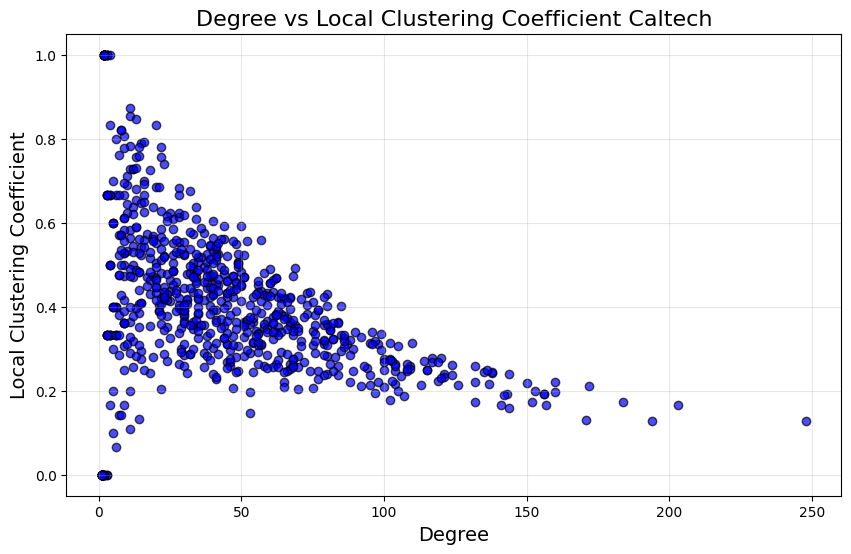

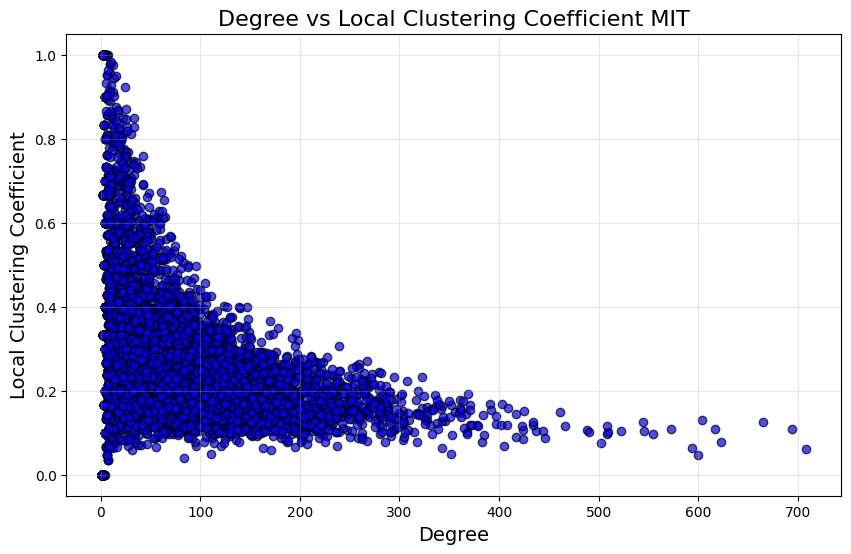

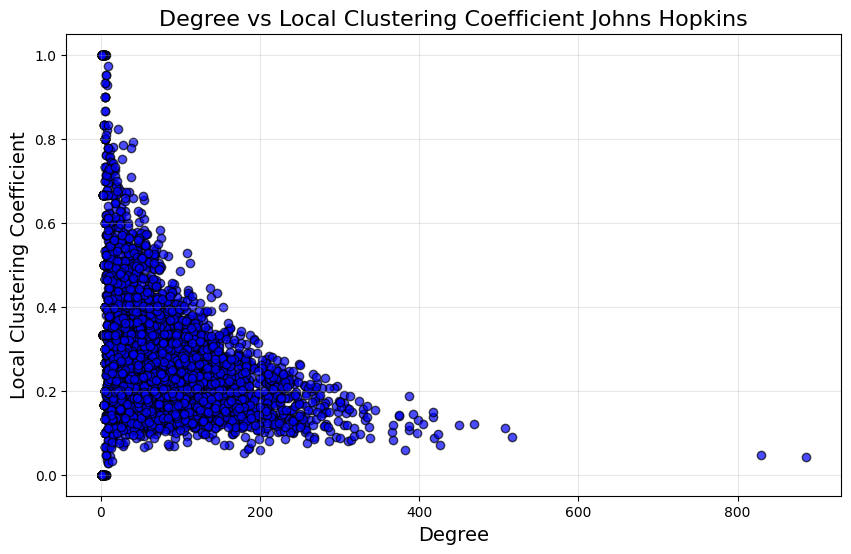

In [10]:
degrees = dict(caltech.degree())  
local_clustering = nx.clustering(caltech)  
x = list(degrees.values())  
y = list(local_clustering.values()) 
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, color='blue', edgecolor='black')
plt.title("Degree vs Local Clustering Coefficient Caltech", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Local Clustering Coefficient", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

degrees = dict(mit.degree())  
local_clustering = nx.clustering(mit)  
x = list(degrees.values())  
y = list(local_clustering.values()) 
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, color='blue', edgecolor='black')
plt.title("Degree vs Local Clustering Coefficient MIT", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Local Clustering Coefficient", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

degrees = dict(jhopkins.degree())  
local_clustering = nx.clustering(jhopkins)  
x = list(degrees.values())  
y = list(local_clustering.values()) 
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, color='blue', edgecolor='black')
plt.title("Degree vs Local Clustering Coefficient Johns Hopkins", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Local Clustering Coefficient", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

### Question 3

A

In [26]:
data_directory = "fb100/data"
attributes = ["student_fac", "major_index", "dorm", "gender"]  # Updated attribute names
results = {attr: {"sizes": [], "assortativity": []} for attr in attributes}
results["degree"] = {"sizes": [], "assortativity": []}
files = [f for f in os.listdir(data_directory) if f.endswith(".gml")]
files = files[:25]

# Process the files and compute the results
for gml_file in files:
    graph_path = os.path.join(data_directory, gml_file)
    graph = nx.read_gml(graph_path)
    n = len(graph)

    # Debugging: Print graph attributes
    print(f"Processing file: {gml_file}")
    all_attributes = set()
    for node, data in graph.nodes(data=True):
        all_attributes.update(data.keys())
    print(f"Node attributes: {all_attributes}")

    for attr in attributes:
        if attr in all_attributes:
            assortativity = nx.attribute_assortativity_coefficient(graph, attr)
            results[attr]["sizes"].append(n)
            results[attr]["assortativity"].append(assortativity)
            print(f"Attribute {attr} found in graph {gml_file}, Assortativity: {assortativity}")
        else:
            print(f"Attribute {attr} not found in graph {gml_file}")

    degree_assortativity = nx.degree_assortativity_coefficient(graph)
    results["degree"]["sizes"].append(n)
    results["degree"]["assortativity"].append(degree_assortativity)

Processing file: American75.gml
Node attributes: {'gender', 'second_major', 'year', 'dorm', 'high_school', 'student_fac', 'major_index'}
Attribute student_fac found in graph American75.gml, Assortativity: 0.28782116313911155
Attribute major_index found in graph American75.gml, Assortativity: 0.04584227592988082
Attribute dorm found in graph American75.gml, Assortativity: 0.21906380800538072
Attribute gender found in graph American75.gml, Assortativity: 0.025516641515032305
Processing file: Amherst41.gml
Node attributes: {'gender', 'second_major', 'year', 'dorm', 'high_school', 'student_fac', 'major_index'}
Attribute student_fac found in graph Amherst41.gml, Assortativity: 0.4034107230365701
Attribute major_index found in graph Amherst41.gml, Assortativity: 0.042037553944773626
Attribute dorm found in graph Amherst41.gml, Assortativity: 0.07481425548102764
Attribute gender found in graph Amherst41.gml, Assortativity: 0.04728403063049691
Processing file: Auburn71.gml
Node attributes: {'g

In [31]:
def plot_scatter_and_distribution(results, attr):
    sizes = results[attr]["sizes"]
    assortativity = results[attr]["assortativity"]

    # Debugging: Print sizes and assortativity values
    print(f"Attribute: {attr}")
    print(f"Sizes: {sizes}")
    print(f"Assortativity: {assortativity}")

    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(sizes, assortativity, alpha=0.7, color="blue", edgecolor="black")
    plt.xscale("log")
    plt.axhline(0, color="red", linestyle="--", linewidth=1, label="No Assortativity")
    plt.title(f"Assortativity vs Network Size ({attr.capitalize()})", fontsize=16)
    plt.xlabel("Network Size (n)", fontsize=14)
    plt.ylabel("Assortativity", fontsize=14)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()

    # KDE plot for distribution
    plt.figure(figsize=(10, 6))
    sns.kdeplot(assortativity, color="blue", fill=False)
    plt.axvline(0, color="red", linestyle="--", linewidth=1, label="No Assortativity")
    plt.title(f"Distribution of Assortativity ({attr.capitalize()})", fontsize=16)
    plt.xlabel("Assortativity", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()

Attribute: student_fac
Sizes: [6386, 2235, 18448, 12803, 11509, 22937, 10004, 2252, 3898, 8600, 19700, 3826, 11247, 769, 6637, 3482, 11770, 18660, 7694, 9895, 7460, 27737, 9414, 12193, 2314]
Assortativity: [0.28782116313911155, 0.4034107230365701, 0.19188583301598133, 0.3001054960040771, 0.5331807976868101, 0.27458585010098285, 0.28566560558585763, 0.40502911762912347, 0.3739665668785806, 0.42455744202161066, 0.4217995017387893, 0.437004438163074, 0.18783822430293196, 0.24407936743342126, 0.31140884072376596, 0.4409103362420721, 0.4228002912622335, 0.405676204703387, 0.4122022116147314, 0.472066970924315, 0.3939499136492069, 0.22214903750070214, 0.5187940365222197, 0.35817720136089554, 0.3464418209816554]


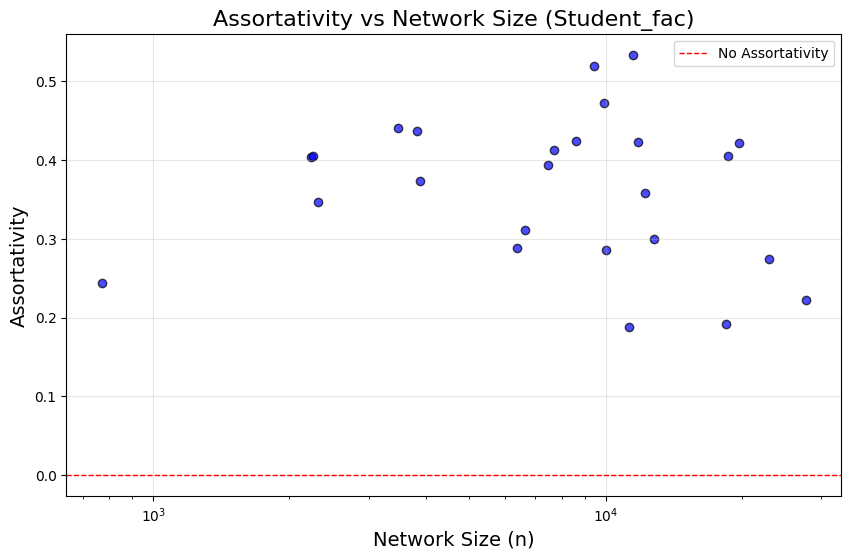

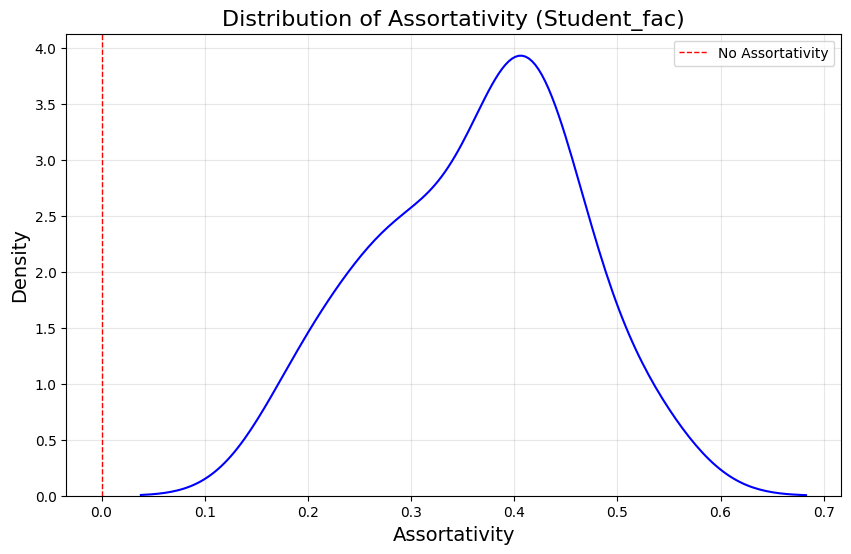

Attribute: major_index
Sizes: [6386, 2235, 18448, 12803, 11509, 22937, 10004, 2252, 3898, 8600, 19700, 3826, 11247, 769, 6637, 3482, 11770, 18660, 7694, 9895, 7460, 27737, 9414, 12193, 2314]
Assortativity: [0.04584227592988082, 0.042037553944773626, 0.039702277549642534, 0.044172234844769925, 0.0400856429594828, 0.05825502994601474, 0.04680298160715488, 0.05272493033944635, 0.03997525544631663, 0.03912469612684111, 0.06794024300787875, 0.05068802524512606, 0.10540018670257108, 0.03471942372358318, 0.13165372912708742, 0.05220371082480271, 0.042998352836705535, 0.08763081689728056, 0.03903446259524427, 0.04205431811648266, 0.03453280363292399, 0.04276377876474231, 0.041079292171341604, 0.042821334901041515, 0.03783187276512914]


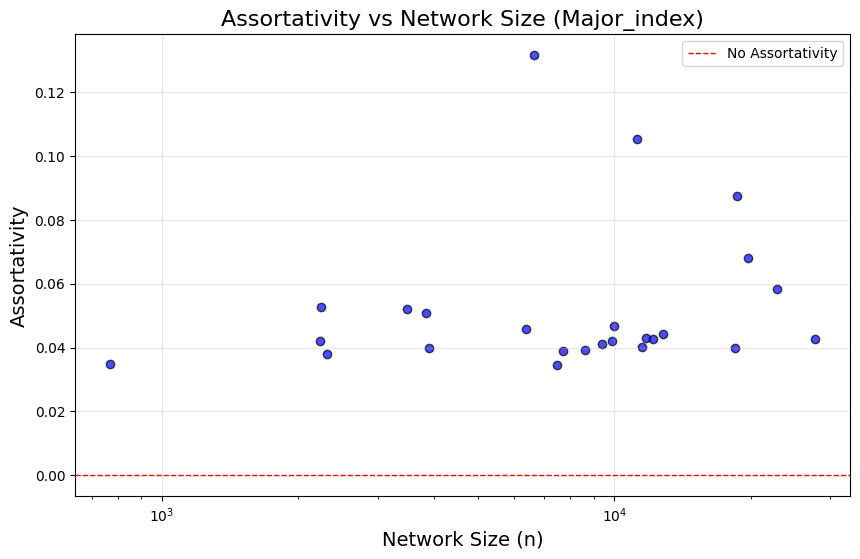

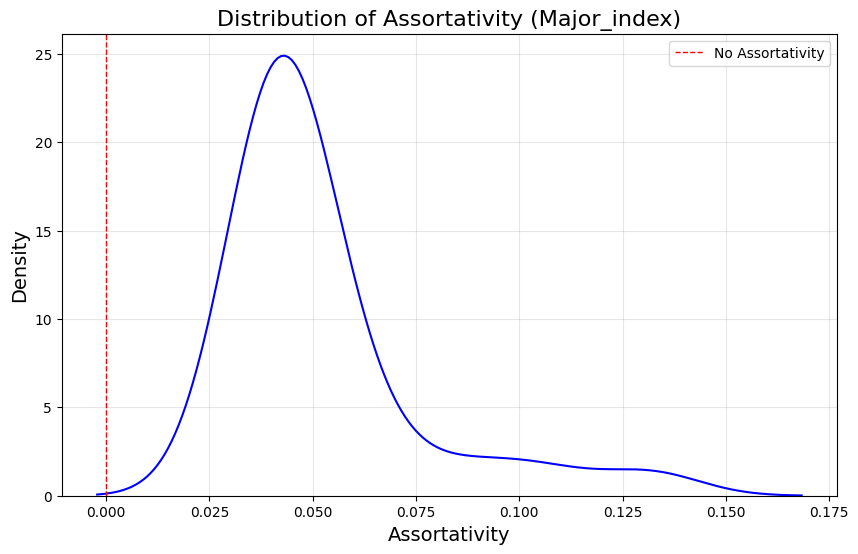

Attribute: dorm
Sizes: [6386, 2235, 18448, 12803, 11509, 22937, 10004, 2252, 3898, 8600, 19700, 3826, 11247, 769, 6637, 3482, 11770, 18660, 7694, 9895, 7460, 27737, 9414, 12193, 2314]
Assortativity: [0.21906380800538072, 0.07481425548102764, 0.24042736612322696, 0.23150741077734033, 0.12056627340754658, 0.1472764407599787, 0.16444205050113206, 0.10032165038531404, 0.17899209844438788, 0.10272238407816026, 0.125745899151448, 0.18117961395570054, 0.21344296168865762, 0.3491531008726444, 0.14017200449375108, 0.15031593379176325, 0.12662993083730836, 0.1755222232199879, 0.12223439633240994, 0.12995492575486298, 0.17594209817998363, 0.18570686354606247, 0.12704415325481117, 0.15603733269018502, 0.10509474528958694]


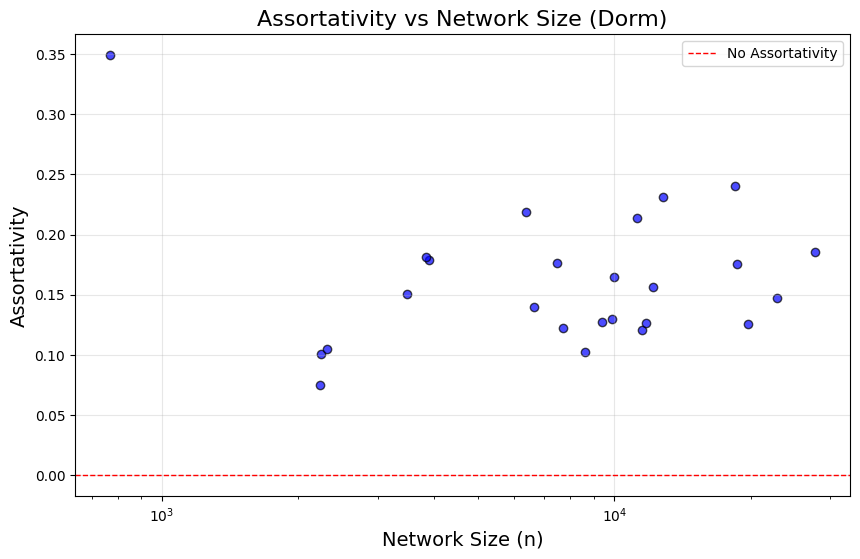

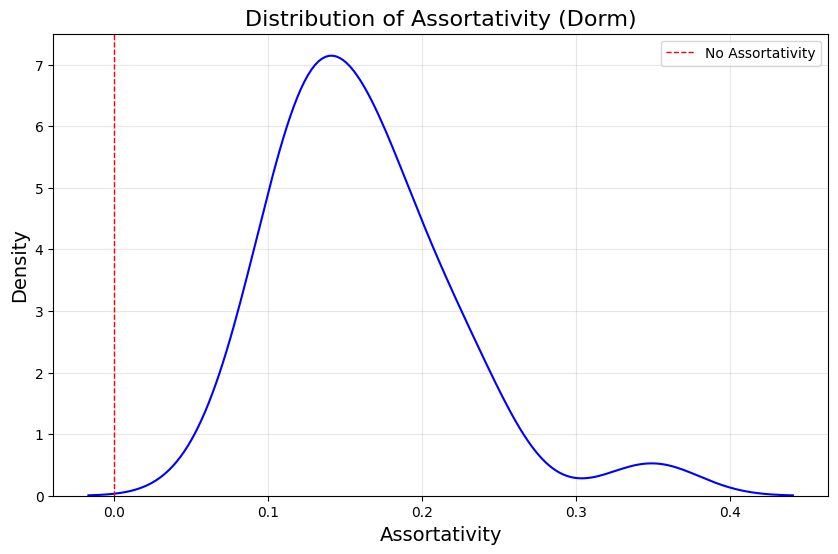

Attribute: gender
Sizes: [6386, 2235, 18448, 12803, 11509, 22937, 10004, 2252, 3898, 8600, 19700, 3826, 11247, 769, 6637, 3482, 11770, 18660, 7694, 9895, 7460, 27737, 9414, 12193, 2314]
Assortativity: [0.025516641515032305, 0.04728403063049691, 0.07860332165875689, 0.07965737069824404, 0.013834242638078986, 0.040922837639318366, 0.014380408209446058, 0.034364287582376016, 0.018033268042430568, 0.0251914233618316, 0.017744701961847728, 0.09533585567552584, 0.01986719564248095, 0.04633143645586916, 0.08222144883022799, 0.07061993504364951, 0.06890174483202012, 0.07228133436858035, 0.07691322430072337, 0.08424904813983711, 0.07664077397929094, 0.034434075224641925, 0.013215201014616186, 0.024769325241314376, 0.07573895904905356]


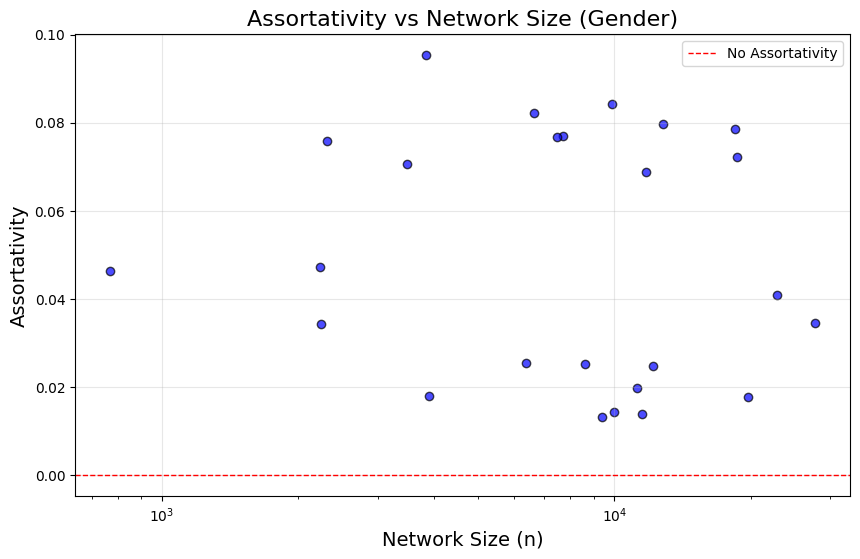

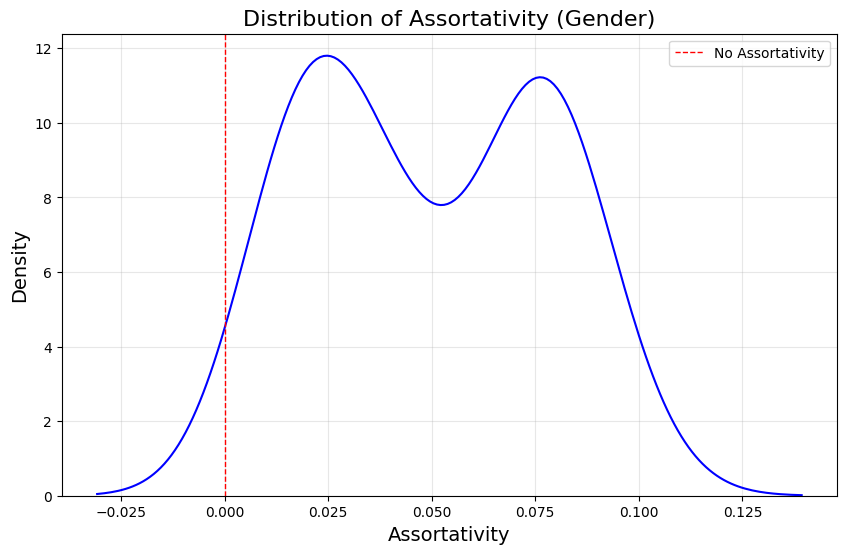

Attribute: degree
Sizes: [6386, 2235, 18448, 12803, 11509, 22937, 10004, 2252, 3898, 8600, 19700, 3826, 11247, 769, 6637, 3482, 11770, 18660, 7694, 9895, 7460, 27737, 9414, 12193, 2314]
Assortativity: [0.06602249890210447, 0.05842838917212475, 0.0010457492217915336, 0.07872980389930079, 0.07603316135214429, 0.010313459088874256, 0.13736406472255866, 0.056204574545371214, -0.025515330213873397, 0.06938877121976782, 0.04536583829567127, 0.09450740246934398, 0.19161218892182671, -0.0652729511948234, 0.1225068616477979, 0.0670008825165129, -0.00217815511056591, 0.018050046886142646, 0.0443844530532393, 0.06667336653755682, 0.06632780311277535, 0.09936155410737192, 0.07542026374100665, 0.025287319007801873, 0.03059367085400868]


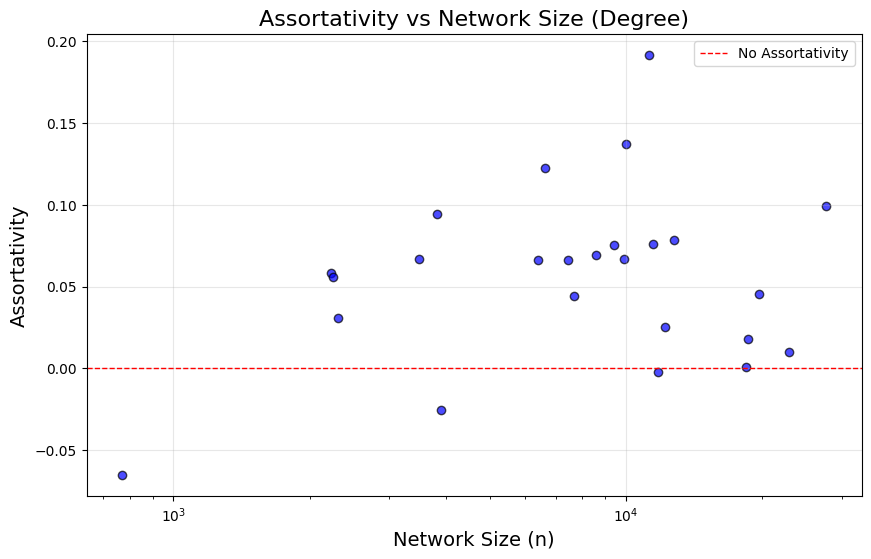

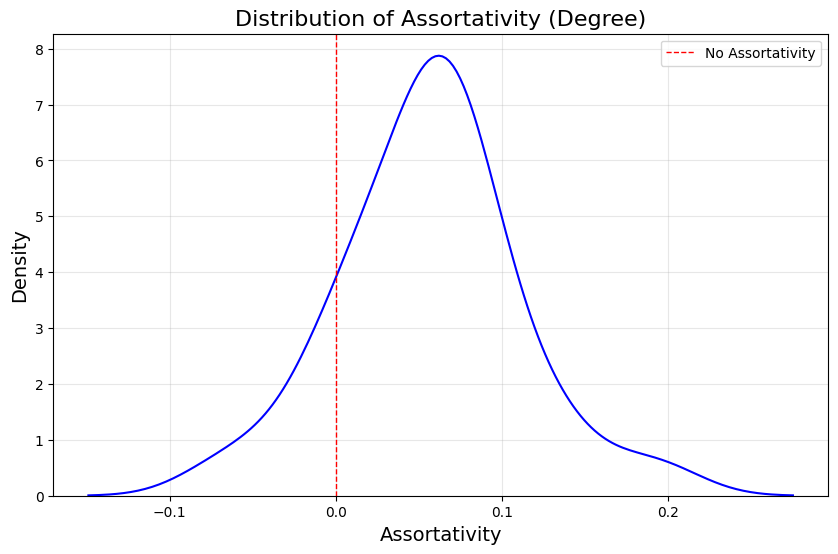

In [32]:
for attr in results:
    plot_scatter_and_distribution(results, attr)

### Question 4

B

In [40]:
import os
import random
import networkx as nx
import numpy as np
from abc import ABC, abstractmethod
from tqdm import tqdm

# Classe de base pour la prédiction de liens
class LinkPrediction(ABC):
    def __init__(self, graph):
        self.graph = graph
        self.nodes = list(graph.nodes())
        self.N = len(self.nodes)

    def neighbors(self, v):
        neighbors_list = self.graph.neighbors(v)
        return list(neighbors_list)

    @abstractmethod
    def fit(self):
        raise NotImplementedError("Fit must be implemented")

# Classe pour la métrique Common Neighbors
class CommonNeighbors(LinkPrediction):
    def __init__(self, graph):
        super(CommonNeighbors, self).__init__(graph)

    def fit(self):
        self.scores = np.zeros((self.N, self.N))
        for i, u in enumerate(tqdm(self.nodes, desc="Common Neighbors")):
            for j, v in enumerate(self.nodes):
                if j <= i:
                    continue
                common = set(self.neighbors(u)) & set(self.neighbors(v))
                self.scores[i, j] = self.scores[j, i] = len(common)
        return self

# Classe pour la métrique Jaccard
class Jaccard(LinkPrediction):
    def __init__(self, graph):
        super(Jaccard, self).__init__(graph)

    def fit(self):
        self.scores = np.zeros((self.N, self.N))
        for i, u in enumerate(tqdm(self.nodes, desc="Jaccard")):
            for j, v in enumerate(self.nodes):
                if j <= i:
                    continue
                intersection = set(self.neighbors(u)) & set(self.neighbors(v))
                union = set(self.neighbors(u)) | set(self.neighbors(v))
                if union:
                    self.scores[i, j] = self.scores[j, i] = len(intersection) / len(union)
        return self

# Classe pour la métrique Adamic/Adar
class AdamicAdar(LinkPrediction):
    def __init__(self, graph):
        super(AdamicAdar, self).__init__(graph)

    def fit(self):
        self.scores = np.zeros((self.N, self.N))
        for i, u in enumerate(tqdm(self.nodes, desc="Adamic/Adar")):
            for j, v in enumerate(self.nodes):
                if j <= i:
                    continue
                common = set(self.neighbors(u)) & set(self.neighbors(v))
                score = sum(1 / np.log(self.graph.degree(w)) for w in common)
                self.scores[i, j] = self.scores[j, i] = score
        return self

# Fonction pour supprimer une fraction des arêtes
def remove_edges(G, fraction):
    edges = list(G.edges())
    num_edges_to_remove = int(fraction * len(edges))
    edges_to_remove = random.sample(edges, num_edges_to_remove)
    G.remove_edges_from(edges_to_remove)
    return G, edges_to_remove

# Fonction pour prédire les liens
def predict_links(G, removed_edges, metric_class):
    predictor = metric_class(G)
    predictor.fit()
    scores = predictor.scores
    predicted_edges = []
    for (u, v) in removed_edges:
        if scores[predictor.nodes.index(u), predictor.nodes.index(v)] > 0:
            predicted_edges.append((u, v, scores[predictor.nodes.index(u), predictor.nodes.index(v)]))
    return predicted_edges


# Fonction pour trier les paires de nœuds prédites par ordre décroissant de confiance
def sort_predicted_edges(predicted_edges):
    return sorted(predicted_edges, key=lambda x: x[2], reverse=True)

# Fonction pour calculer les métriques top@k, recall@k et precision@k
def compute_metrics(removed_edges, predicted_edges, k_values):
    sorted_predicted_edges = sort_predicted_edges(predicted_edges)
    removed_edges_set = set(removed_edges)

    metrics = {}
    for k in k_values:
        top_k_predicted_edges = set(sorted_predicted_edges[:k])
        intersection = top_k_predicted_edges & removed_edges_set
        top_k = len(intersection) / k
        recall_k = len(intersection) / len(removed_edges_set)
        precision_k = len(intersection) / k
        metrics[k] = {'top@k': top_k, 'recall@k': recall_k, 'precision@k': precision_k}

    return metrics

C

In [39]:
graph = nx.read_gml("fb100/data/Caltech36.gml")


# Fractions à tester
fractions = [0.05, 0.1, 0.15, 0.2]

for fraction in fractions:
    print(f"Testing with fraction: {fraction}")
    G_modified, removed_edges = remove_edges(graph.copy(), fraction)

    # Prédire les liens avec différentes métriques
    cn_predicted_edges = predict_links(G_modified, removed_edges, CommonNeighbors)
    jaccard_predicted_edges = predict_links(G_modified, removed_edges, Jaccard)
    aa_predicted_edges = predict_links(G_modified, removed_edges, AdamicAdar)

    # Afficher les liens prédits
    print("Common Neighbors Predicted Edges:", cn_predicted_edges[:10])  # Afficher les 10 premiers
    print("Jaccard Predicted Edges:", jaccard_predicted_edges[:10])  # Afficher les 10 premiers
    print("Adamic/Adar Predicted Edges:", aa_predicted_edges[:10])  # Afficher les 10 premiers

Testing with fraction: 0.05


Adamic/Adar: 100%|██████████| 769/769 [00:03<00:00, 210.65it/s]


Common Neighbors Predicted Edges: [('25', '307', np.float64(23.0)), ('542', '560', np.float64(9.0)), ('165', '451', np.float64(8.0)), ('0', '320', np.float64(42.0)), ('194', '254', np.float64(31.0)), ('337', '562', np.float64(34.0)), ('161', '374', np.float64(7.0)), ('153', '668', np.float64(18.0)), ('77', '754', np.float64(21.0)), ('37', '82', np.float64(26.0))]
Jaccard Predicted Edges: [('25', '307', np.float64(0.20175438596491227)), ('542', '560', np.float64(0.14285714285714285)), ('165', '451', np.float64(0.09411764705882353)), ('0', '320', np.float64(0.2709677419354839)), ('194', '254', np.float64(0.22627737226277372)), ('337', '562', np.float64(0.24113475177304963)), ('161', '374', np.float64(0.056)), ('153', '668', np.float64(0.20224719101123595)), ('77', '754', np.float64(0.15328467153284672)), ('37', '82', np.float64(0.33766233766233766))]
Adamic/Adar Predicted Edges: [('25', '307', np.float64(5.658688487867206)), ('542', '560', np.float64(2.1140459785546692)), ('165', '451', 

Adamic/Adar: 100%|██████████| 769/769 [00:03<00:00, 235.16it/s]


Common Neighbors Predicted Edges: [('331', '638', np.float64(8.0)), ('264', '395', np.float64(12.0)), ('514', '655', np.float64(12.0)), ('160', '248', np.float64(22.0)), ('306', '655', np.float64(4.0)), ('363', '555', np.float64(16.0)), ('92', '259', np.float64(2.0)), ('89', '510', np.float64(46.0)), ('145', '766', np.float64(13.0)), ('131', '744', np.float64(39.0))]
Jaccard Predicted Edges: [('331', '638', np.float64(0.14814814814814814)), ('264', '395', np.float64(0.08633093525179857)), ('514', '655', np.float64(0.12121212121212122)), ('160', '248', np.float64(0.19642857142857142)), ('306', '655', np.float64(0.047619047619047616)), ('363', '555', np.float64(0.20253164556962025)), ('92', '259', np.float64(0.028169014084507043)), ('89', '510', np.float64(0.2072072072072072)), ('145', '766', np.float64(0.08280254777070063)), ('131', '744', np.float64(0.2765957446808511))]
Adamic/Adar Predicted Edges: [('331', '638', np.float64(2.6481918944483245)), ('264', '395', np.float64(2.8279835539

Adamic/Adar: 100%|██████████| 769/769 [00:03<00:00, 243.32it/s]


Common Neighbors Predicted Edges: [('243', '511', np.float64(24.0)), ('432', '719', np.float64(4.0)), ('389', '443', np.float64(30.0)), ('250', '686', np.float64(24.0)), ('433', '619', np.float64(16.0)), ('270', '435', np.float64(9.0)), ('372', '586', np.float64(2.0)), ('324', '734', np.float64(17.0)), ('442', '483', np.float64(7.0)), ('82', '148', np.float64(27.0))]
Jaccard Predicted Edges: [('243', '511', np.float64(0.32432432432432434)), ('432', '719', np.float64(0.038461538461538464)), ('389', '443', np.float64(0.25210084033613445)), ('250', '686', np.float64(0.125)), ('433', '619', np.float64(0.2191780821917808)), ('270', '435', np.float64(0.09473684210526316)), ('372', '586', np.float64(0.012658227848101266)), ('324', '734', np.float64(0.10119047619047619)), ('442', '483', np.float64(0.04929577464788732)), ('82', '148', np.float64(0.32926829268292684))]
Adamic/Adar Predicted Edges: [('243', '511', np.float64(5.892959288826537)), ('432', '719', np.float64(0.9089161691197561)), ('3

Adamic/Adar: 100%|██████████| 769/769 [00:02<00:00, 262.45it/s]


Common Neighbors Predicted Edges: [('231', '640', np.float64(12.0)), ('275', '494', np.float64(15.0)), ('89', '376', np.float64(75.0)), ('622', '678', np.float64(23.0)), ('88', '656', np.float64(3.0)), ('24', '656', np.float64(19.0)), ('182', '543', np.float64(13.0)), ('312', '414', np.float64(6.0)), ('51', '458', np.float64(9.0)), ('111', '225', np.float64(6.0))]
Jaccard Predicted Edges: [('231', '640', np.float64(0.17142857142857143)), ('275', '494', np.float64(0.12931034482758622)), ('89', '376', np.float64(0.3424657534246575)), ('622', '678', np.float64(0.12105263157894737)), ('88', '656', np.float64(0.03529411764705882)), ('24', '656', np.float64(0.18446601941747573)), ('182', '543', np.float64(0.1566265060240964)), ('312', '414', np.float64(0.06818181818181818)), ('51', '458', np.float64(0.12857142857142856)), ('111', '225', np.float64(0.1))]
Adamic/Adar Predicted Edges: [('231', '640', np.float64(2.913077613236717)), ('275', '494', np.float64(3.5153406584377014)), ('89', '376', 

In [41]:
fractions = [0.05, 0.1, 0.15, 0.2]
k_values = [50, 100, 200, 400]

for fraction in fractions:
    print(f"Testing with fraction: {fraction}")
    G_modified, removed_edges = remove_edges(graph.copy(), fraction)

    # Prédire les liens avec différentes métriques
    cn_predicted_edges = predict_links(G_modified, removed_edges, CommonNeighbors)
    jaccard_predicted_edges = predict_links(G_modified, removed_edges, Jaccard)
    aa_predicted_edges = predict_links(G_modified, removed_edges, AdamicAdar)

    # Calculer les métriques
    cn_metrics = compute_metrics(removed_edges, cn_predicted_edges, k_values)
    jaccard_metrics = compute_metrics(removed_edges, jaccard_predicted_edges, k_values)
    aa_metrics = compute_metrics(removed_edges, aa_predicted_edges, k_values)

    # Afficher les métriques
    print("Common Neighbors Metrics:", cn_metrics)
    print("Jaccard Metrics:", jaccard_metrics)
    print("Adamic/Adar Metrics:", aa_metrics)


Testing with fraction: 0.05


Adamic/Adar: 100%|██████████| 769/769 [00:03<00:00, 238.96it/s]


Common Neighbors Metrics: {50: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 100: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 200: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 400: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}}
Jaccard Metrics: {50: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 100: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 200: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 400: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}}
Adamic/Adar Metrics: {50: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 100: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 200: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 400: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}}
Testing with fraction: 0.1


Adamic/Adar: 100%|██████████| 769/769 [00:03<00:00, 255.36it/s]


Common Neighbors Metrics: {50: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 100: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 200: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 400: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}}
Jaccard Metrics: {50: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 100: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 200: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 400: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}}
Adamic/Adar Metrics: {50: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 100: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 200: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 400: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}}
Testing with fraction: 0.15


Adamic/Adar: 100%|██████████| 769/769 [00:02<00:00, 283.40it/s]


Common Neighbors Metrics: {50: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 100: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 200: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 400: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}}
Jaccard Metrics: {50: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 100: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 200: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 400: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}}
Adamic/Adar Metrics: {50: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 100: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 200: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 400: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}}
Testing with fraction: 0.2


Adamic/Adar: 100%|██████████| 769/769 [00:02<00:00, 289.00it/s]


Common Neighbors Metrics: {50: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 100: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 200: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 400: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}}
Jaccard Metrics: {50: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 100: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 200: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 400: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}}
Adamic/Adar Metrics: {50: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 100: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 200: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}, 400: {'top@k': 0.0, 'recall@k': 0.0, 'precision@k': 0.0}}


Erreur dans l'implementation au vu des résultats obtenus ?

### Question 5

B C D

In [53]:
class LabelPropagation:
    def __init__(self, graph, labels, max_iter=10):
        self.graph = graph
        self.labels = labels
        self.max_iter = max_iter
        self.num_nodes = len(graph.nodes())

    def propagate(self):
        current_labels = self.labels.copy()

        for iter in range(self.max_iter):
            label_change = 0
            for v in self.graph.nodes():
                if current_labels[v] == -1:  # Si le label est manquant (initialisé à -1)
                    neighbor_labels = [current_labels[neighbor] for neighbor in self.graph.neighbors(v)]
                    if neighbor_labels:
                        max_label = max(set(neighbor_labels), key=neighbor_labels.count)
                        if current_labels[v] != max_label:
                            current_labels[v] = max_label
                            label_change += 1

            if label_change == 0:
                break

        return current_labels

# Fonction pour supprimer une fraction des attributs des nœuds
def remove_attributes(graph, attribute, fraction):
    nodes = list(graph.nodes())
    num_nodes_to_remove = int(fraction * len(nodes))
    nodes_to_remove = random.sample(nodes, num_nodes_to_remove)
    original_labels = {node: graph.nodes[node][attribute] for node in nodes_to_remove}
    for node in nodes_to_remove:
        graph.nodes[node][attribute] = -1  # Marquer l'attribut comme manquant
    return graph, original_labels

# Fonction pour récupérer les attributs manquants
def recover_attributes(graph, attribute, max_iter=10):
    labels = {node: data[attribute] for node, data in graph.nodes(data=True)}
    lpa = LabelPropagation(graph, labels, max_iter)
    recovered_labels = lpa.propagate()
    return recovered_labels

# Fonction pour calculer MAE, l'exactitude et le F1-score
def compute_metrics(original_labels, recovered_labels):
    correct_predictions = 0
    total_missing = len(original_labels)
    mae_sum = 0
    true_labels = []
    pred_labels = []

    for node, original_label in original_labels.items():
        recovered_label = recovered_labels[node]
        true_labels.append(original_label)
        pred_labels.append(recovered_label)
        if original_label == recovered_label:
            correct_predictions += 1
        mae_sum += abs(original_label - recovered_label)

    mae = mae_sum / total_missing
    accuracy = correct_predictions / total_missing
    return mae, accuracy


In [55]:

graph = nx.read_gml("fb100/data/Caltech36.gml")

# Attributs à tester
attributes = ["dorm", "major_index", "gender"]
fractions = [0.1, 0.2, 0.3]

results = {}

for attribute in attributes:
    results[attribute] = {}
    for fraction in fractions:
        print(f"Testing with attribute: {attribute}, fraction: {fraction}")
        modified_graph, original_labels = remove_attributes(graph.copy(), attribute, fraction)
        recovered_labels = recover_attributes(modified_graph, attribute)

        mae, accuracy = compute_metrics(original_labels, recovered_labels)
        results[attribute][fraction] = {'MAE': mae, 'Accuracy': accuracy}

        print(f"Attribute: {attribute}, Fraction: {fraction}, MAE: {mae}, Accuracy: {accuracy}")

# Afficher les résultats
for attribute, fraction_results in results.items():
    print(f"Results for attribute: {attribute}")
    for fraction, metrics in fraction_results.items():
        print(f"Fraction: {fraction}, MAE: {metrics['MAE']}, Accuracy: {metrics['Accuracy']}")

Testing with attribute: dorm, fraction: 0.1
Attribute: dorm, Fraction: 0.1, MAE: 24.513157894736842, Accuracy: 0.7763157894736842
Testing with attribute: dorm, fraction: 0.2
Attribute: dorm, Fraction: 0.2, MAE: 41.08496732026144, Accuracy: 0.6862745098039216
Testing with attribute: dorm, fraction: 0.3
Attribute: dorm, Fraction: 0.3, MAE: 28.917391304347827, Accuracy: 0.7260869565217392
Testing with attribute: major_index, fraction: 0.1
Attribute: major_index, Fraction: 0.1, MAE: 31.32894736842105, Accuracy: 0.25
Testing with attribute: major_index, fraction: 0.2
Attribute: major_index, Fraction: 0.2, MAE: 34.73856209150327, Accuracy: 0.2222222222222222
Testing with attribute: major_index, fraction: 0.3
Attribute: major_index, Fraction: 0.3, MAE: 132.7478260869565, Accuracy: 0.10869565217391304
Testing with attribute: gender, fraction: 0.1
Attribute: gender, Fraction: 0.1, MAE: 0.5131578947368421, Accuracy: 0.5789473684210527
Testing with attribute: gender, fraction: 0.2
Attribute: gend